# The path to Quantum in production in the financial industry

## How could quantum avoid the drawbacks of classical optimization algorithms?


## Learning objectives of the challenge

**1.** Leverage quantum computing to try to avoid the drawbacks of classical optimization algorithms for portfolio optimization in the financial industry. What are the most promising problems and the corresponding techniques to solve them? <br>
**2.** What are the main bottlenecks/steps to solve financial optimization problems with quantum? What are the proposals in the literature to overcome them? Inclusion of equality and inequality constraints in optimization problems. <br>
**3.** Mapping a classical portfolio optimization problem to a quantum one. <br>
**4.** Think about resource estimation, can we do something useful with near term devices? How far are we from quantum advantage? How do we translate hardware roadmaps into utility timelines? <br>
**5.** Use of simulated annealing and other quantum computing techniques to find the solution of the problem. 

## The challenge

### Portfolio optimization in the financial industry


Portfolio optimization is a formal mathematical approach to making investment decisions across a collection of financial instruments or assets. In 1952, Harry Markowitz introduced Modern Portfolio Theory (MPT). MPT introduced the notion that the diversification of a portfolio can inherently decrease the risk of a portfolio. Simply put, this meant that investors could increase their returns while also reducing their risk. Markowitz’s work on MPT was groundbreaking in the world of asset allocation, eventually earning him a Nobel prize for his work in 1990.


The behaviour of a portfolio can be quite different from the behaviour of
individual components of the portfolio. The risk of a properly constructed
portfolio from equities in leading markets could be half the sum of the risks of
individual assets in the portfolio. This is due to complex correlation patterns
between individual assets or equities. A good optimizer can exploit the
correlations, the expected returns, the risk (variance) and user constraints
to obtain an optimized portfolio.

Portfolio optimization is often called **mean-variance (MV)** optimization.
The term mean refers to the *mean or the expected return* of the investment
and the *variance* is the measure of the risk associated with the portfolio.

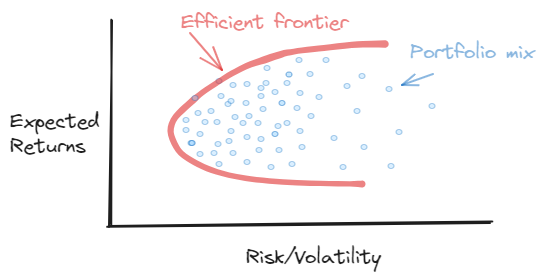






In this challenge, we consider an alternative Markowitz’s mean–variance model in which the variance is replaced with an industry standard risk measure, Value-at-Risk (VaR), in order to better assess market risk exposure associated with financial and commodity asset price fluctuations.


 VaR is defined as the maximum dollar amount expected to be lost over a given time horizon, at a pre-defined confidence level. For example, if the 95% one-month VAR is 1 million dollars, there is 95% confidence that over the next month the portfolio will not lose more than 1 million dollars. Realistic portfolio optimization in the mean-VaR framework is a challenging problem since it leads to a *non-convex NP-hard problem* which is computationally intractable. In fact, minimizing a nonparametric VaR measure is a complex task due to the non-smooth objective function landscape with many local minima. When more dimensions and trading constraints are added to the problem, the complexity of the problem increases. Hence, a good candidate to becnhmark quantum optimization heuristics.

In the MV model, risk is defined by a dispersion parameter and it is assumed that returns are normally or elliptically distributed. However, the distributions of returns are asymmetric and usually have excess kurtosis in practice. Variance as a risk measure has thus been widely criticized by practitioners due to its symmetrical measure which equally weights desirable positive returns and undesirable negative ones. In fact, Markowitz recognized the inefficiencies embedded in the mean–variance approach. As a result, several extensions
and modifications of the basic Markowitz model reflecting real-world constraints have been developed.




### Problem Statement -- The Mean-Variance-VaR model

Note that here we closely follow reference
[Mean-Variance-VaR portfolios: MIQP formulation and performance analysis](https://arxiv.org/abs/2111.09773). One could read this reference for an overview on the topic.

Consider n assets with the following portfolio:

$$x \epsilon \Delta = \{ x \epsilon \mathbb{R}^{n} : \sum_{k=1}^{n} x_{k}=1, x_{k} \ge 0, k=1, \dots, n \}$$

with $x_{k}$ the percentage of the total portfolio invested in asset $k$ (let's call this $\textit{Asset}_{k}$) and $n$ the total number of assets. The equality $\sum_{k=1}^{n} x_{k}=1$  that 100% of the total portfolio is invested and $x_{k}\ge 0$ indicates that all the percentages are positive (no-short sellings constraint).

By having in mind that the investment decision at a particular point in time is made considering **T** equally likely scenarios, the portfolio return is given by:

$$R_{Pt}(x)=\sum_{k=1}^{n}x_{k}r_{kt}$$

with the variables $r_{kt}$ corresponding to the return of each asset $k$ for the scenario $t \epsilon \{ 1, \dots, T \}$.

The classical **Mean-Variance** portfolio optimization problem focuses on minimizing the variance (risk), while at the same time making sure that the expected return is above a specific value $\eta$. It has the following convex form:

$$\min \sum_{k=1}^{n}\sum_{j=1}^{n} x_{k}x_{j}\sigma_{kj}$$

$$\text{s.t.}$$

$$\sum_{k=1}^{n} \mu_{k}x_{k} \ge \eta$$ 


$$\sum_{k=1}^{n} x_{k}=1$$ 


$$x_{k}\ge 0  \ \text{for}\ k=1,\dots,n $$

with $\sigma^{2}_{P}(x)=\sum_{k=1}^{n}\sum_{j=1}^{n} x_{k}x_{j}\sigma_{kj}$ the portfolio variance ($\sigma_{kj}$ the covariance between the assets $k$ and $j$), $\mu_{P}(x)=\sum_{k=1}^{n} \mu_{k}x_{k}$ the expected total return ($\mu_{k}=\frac{1}{T}\sum_{t=1}^{T}r_{kt}$ is the expected return of asset k).
\
\
The inequality $\sum_{k=1}^{n} \mu_{k}x_{k} \ge \eta$ indicates that the expected total returns should be above or equal a specific target value ($\eta$). 
\
\
By solving the optimization problem above, one gets the **best distribution of assets**, or differently the optimal set of percentages $\{x_{k}\}$ of the total portfolio that should be invested in each one of the assets $k$. For example consider $\textit{Asset}_1$, with the corresponding optimal percentage $x_{1}$. If the solution of the problem is $x_{1}=0.1$ that means that 10% of the total portfolio should be invested in  $\textit{Asset}_1$.

The above optimization problem does not include the Value-at-Risk (VaR), which is an additional risk measure. $VaR_{\epsilon}$ is defined as the **maximum loss** for scenarios $\{1, \dots, T\}$ with $(1-\epsilon)$ the given confidence level. $\epsilon$ typically takes the values $\epsilon=0.01, 0.05, 0.10$.

To further understand what VaR is, first consider that for a given portfolio $x$, the portfolio loss is given by $L_{P}(x)=-\sum_{k=1}^{n}x_{k}R_{k}$, with $R_{k}$ the return of asset $k$. $VaR_{\epsilon}(x)$ is the value such that the portfolio loss $L_{P}(x)$ is above $VaR_{\epsilon}(x)$ with probability $\epsilon \times 100 \%$.  If we include $VaR_{\epsilon}$ in the **Mean-Variance** portfolio optimization problem we have the **Mean-Variance-VaR** approach. In this approach, a portfolio return $R_{P}(x)$ is preferred to $R_{P}(y)$ iff $\mu_{P}(x)\ge \mu_{P}(y)$, $\sigma^{2}_{P}(x)\le \sigma^{2}_{P}(y)$ and $VaR_{\epsilon}(x)\le VaR_{\epsilon}(y)$.

By following [Mean-Variance-VaR portfolios: MIQP formulation and performance analysis](https://arxiv.org/abs/2111.09773) the **Mean-Variance-VaR** problem is written as a **Mixed-Integer Quadratic Programming (MIQP)** problem:

$$min_{(x, r_{\epsilon}, y)}\sum_{k=1}^{n}\sum_{j=1}^{n}x_{k}x_{j}\sigma_{kj}$$

$$\text s.t.$$ 
$$\sum_{k=1}^{n}\mu_{k}x_{k}\ge  \eta$$
$$-r_{\epsilon} \le z$$
$$r_{\epsilon}\le \sum_{k=1}^{n}r_{kt}x_{k}+M(1-y_{t})\ \text{for}\ t=1, \dots, T$$
$$\sum_{t=1}^{T} y_{t} \ge (1-\epsilon)T$$ 
$$\sum_{k=1}^{n}x_{k}=1$$
$$x_{k} \ge 0\ \text{for}\ k=1, \dots, n$$
$$y_{t}\epsilon \{ 0,1 \} \ \text{for}\ t=1, \dots, T$$

with $VaR_{\epsilon}(x)=-r_{\epsilon}$, $r_{\epsilon}$ a real and positive variable. Therefore $-r_{\epsilon}$ represents the VaR of the portfolio and is bounded above by $z$ (which is real and positive, $z\gt 0$), which is actually the target VaR. This is expressed as $-r_{\epsilon} \le z$ above.
\
\
$M$ is a large positive number that has to be fine-tuned in the optimization procedure. Find the optimal $M$ value here: [Mean-Variance-VaR portfolios: MIQP formulation and performance analysis](https://link.springer.com/article/10.1007/s00291-023-00719-x) and use it in the exercises below. $y_{t}$ (for $t=1,\dots,T$) are boolean variables.
\
\
The inequalities $r_{\epsilon}\le \sum_{k=1}^{n}r_{kt}x_{k}+M(1-y_{t})$ (one for each event $t$) indicate the following: if the **portfolio loss** $-\sum_{k=1}^{n}r_{kt}x_{k}$ is above the VaR $-r_{\epsilon}$ that means that $y_{t}$ must be 0 (for sufficiently big $M$). That practically means that if the portfolio loss is above the VaR, the event $t$ should **not** happen ($y_{t}=0$).
\
\
For the challenge, we simplify the problem as follows:

$$ \textbf{Mean-Variance-VaR Simplified Version}$$

$$min_{(x, r_{\epsilon}, y)}\sum_{k=1}^{n}\sum_{j=1}^{n}x_{k}x_{j}\sigma_{kj}-\sum_{k=1}^{n}\mu_{k}x_{k}$$

$$\text s.t.$$
$$-r_{\epsilon} \le z$$
$$r_{\epsilon}\le \sum_{k=1}^{n}r_{kt}x_{k}+M(1-y_{t})\ \text{for}\ t=1, \dots, T$$
$$\sum_{t=1}^{T} y_{t} \ge (1-\epsilon)T$$ 
$$\sum_{k=1}^{n}x_{k}=1$$
$$x_{k} \ge 0\ \text{for}\ k=1, \dots, n$$
$$y_{t}\epsilon \{ 0,1 \} \ \text{for}\ t=1, \dots, T$$

Specifically, we include the expected total returns, $\sum_{k=1}^{n}\mu_{k}x_{k}$, in the objective fuction $f(x)=\sum_{k=1}^{n}\sum_{j=1}^{n}x_{k}x_{j}\sigma_{kj}-\sum_{k=1}^{n}\mu_{k}x_{k}$ that is minimized. Now, by minimizing the objective function we select the **best distribution of assets** that maximize the return and minimize the variance (risk), while making sure that the equality/inequality constraints written above are also satisfied.

In the next sections you will learn how one can solve the **Mean-Variance-VaR Simplified Version** problem with quantum or quantum-inspired techniques.


<div class="alert alert-block alert-success"> 
    
**STEPS:**
    
1. Learn how to incorporate the equality/inequality constraints of the **Mean-Variance-VaR Simplified Version** problem in the objective function that is minimized.
2. Cast the problem into the QUBO formulation, by choosing an **encoding** for all the variables of step 1. The QUBO formulation can be used for finding the solution of the problem **classically** or with **quantum** or **quantum-inspired** methods.
3. Use Simulated Annealing to solve the problem. This is a specific algorithm used for **optimization problems**.
4. Evaluate the solutions of step 3.
5. Move to **quantum** optimization techniques such as Quantum Annealing or QAOA to solve the problem. 
 </div>

### Reading in financial data


To examine the practical applicability of the mean-VaR model with quantum techniques, we will use a small dataset that compromises the weekly linear returns for Eurostoxx50 Market Index from 01-22-2007 to 05-06-2013 and contains up to 32 assets. You may find the associated file: *returns_data.txt*

In [1]:
import numpy as np
import pandas as pd

# You may choose to select different parameters/values
number_assets = 3
T  = 10
# Read returns
df = pd.read_csv('returns_data.txt',delim_whitespace=True)

Rraw = df.values.T

# Select the first N,T assets and scenarios, you may choose a different strategy if you would like to do so.
R = Rraw[:number_assets,:T]

# Expected return of each asset
expected_returns = np.mean(R, axis = 1)

# Covariance matrix of asset returns
covariance_matrix = np.cov(R)

### Section 1: Incorporating equality/inequality constraints

- Convert the inequalities of the **Mean-Variance-VaR Simplified Version** problem into equalities, with the use of slack variables and the penalty method approach. For reference one could read [A real world test of Portfolio Optimization with Quantum Annealing](https://arxiv.org/abs/2303.12601)  (page 10).
Specifically, re-write the objective function above as a new objective function called L that includes the inequality constraints. To do that usually one introduces new variables, called **slack variables**, that transform an inequality constraint into an equality constraint. If you do that for each inequality of the optimization problem, what are the total number of variables to be optimized including the slack variables?
- In a similar way and by following the same reference, try to incorporate the one equality constraint, $\sum_{k=1}^{n}x_{k}=1$ as a penalty term in the objective function L. Notice that now slack variables are not needed.

<div class="alert alert-block alert-info"> <b>NOTE</b>:
L has the following form: $L=\sum_{k=1}^{n}\sum_{j=1}^{n}x_{k}x_{j}\sigma_{kj}-\sum_{k=1}^{n}\mu_{k}x_{k}+\textit{penalty terms}$, with the penalty terms to be found in this section (and include all the equalities and inequalities of the problem). This will need to be mapped to a quantum Hamiltonian in the following section. Each penalty term will correspond to one lagrange multiplier that will need to be fine-tuned in the next sections, so that the constraints are imposed.
</div>

**Answer:**

### Section 2: Encoding/Casting the problem into a QUBO formulation

Many discrete optimization problems that are NP hard can be mapped to quadratically unconstrained binary optimization (QUBO) problems. A QUBO can be expressed in the following form:

 $$\text{min} \quad z^{T}Qz$$

with $z \epsilon \{ 0,1\}^{N}$ the bit vector and $Q \epsilon \mathbb{R}^{N \times N}$ the corresponding QUBO matrix. The aim of this exercise is to write the objective function L you found in **Section 1** in the QUBO form, with $z$ a vector that includes all the variables $\{x_{i}\}$ ($i \in \{1, \dots n\}$), $r_{\epsilon}$, $\{ y_{t} \}$ ($t \in \{1, \dots, T \}$) and the slack variables introduced in **Section 1**.

Map the classical objective function of **Section 1** to a quantum Hamiltonian. Follow the steps:
- Map all the variables $\{x_{i}\}$, $r_{\epsilon}$, $\{ y_{t} \}$ and the slack variables of **Section 1** into different binary variables. Reference [Approaching Collateral Optimization for NISQ and Quantum-Inspired Computing](https://arxiv.org/pdf/2305.16395.pdf) indicates how to map the slack variables into binary ones, with the use of the "log-encoding" in pages 4-5. However, reference [Solving the Optimal Trading Trajectory Problem Using a Quantum Annealer](https://arxiv.org/abs/1508.06182) presents different encodings.

The encodings can be writen as a linear function of binary variables. For example, for the variable $x_{i}$ we have:
$$x_{i}=\sum_{d=1}^{D}f(d)z_{di}$$
with $z_{di} \epsilon \{ 0,1\}$ and $f(d)$ the function you are looking for (particular for each encoding). Notice that you will need to introduce $D$ new binary variables, for each variable $x_{i}$.

-  Which encoding did you use for each of the variables $\{x_{i}\}$, $r_{\epsilon}$, $\{y_{t}\}$, which for the slack variables and why?
-  As you can see, the total number of variables increase after the encoding. What is the total number of binary variables that you have after the mapping?
-  One could cast the problem into a QUBO form, by finding $Q$. Then one can map it to a Hamiltonian by promoting all the binary variables (for example $z_{di}$) to binary operators ($z_{di} \rightarrow \hat{z}_{di}$). The Hamiltonian will then have the following form $\hat{H}=\hat{z}^{T}Q\hat{z}$ with $Q \epsilon \mathbb{R}^{N \times N}$ the corresponding QUBO matrix. You do **not** need to find the explicit QUBO form of the Hamiltonian $\hat{H}$. Instead, substitute the encoding you found in this section to the Langrange formulation of **Section 1** (let's call it $L_{fin}$). Then, use $L_{fin}$ and with the help of [pyqubo](https://pyqubo.readthedocs.io/en/latest/getting_started.html#) find the QUBO formulation of the problem, by finding the matrix $Q$. One could then promote all the variables to operators, to find the quantum version of $L_{fin}$ (let's call it $\hat{H}$). $L_{fin}$ and $\hat{H}$ will be used in the following sections.

<div class="alert alert-block alert-info"> <b>NOTE 1</b>:
    
Notice that the above optimization problem can be translated to an Ising Hamiltonian with the following change of variables $x_{i}=\frac{1-\sigma_{i}}{2}$ as:
    $$H(s)=-\sum_{j}h_{j}\sigma_{j}-\sum_{j<k}J_{jk}\sigma_{j}\sigma_{k}$$
with $\sigma \epsilon \{ -1, 1 \}^{N}$ the spins, $h \epsilon \mathbb{R}^{N}$ the magnetic field and $J \epsilon \mathbb{R}^{N \times N}$ the spin-spin interaction matrix between two spins $j$ and $k$. For more information on this one could take a look at the Appendix B of [Approaching Collateral Optimization for NISQ and Quantum-Inspired Computing](https://arxiv.org/pdf/2305.16395.pdf), although this is **not** needed in order to complete this exercise.                              
</div>

<div class="alert alert-block alert-info"> <b>NOTE 2 (Hint)</b>:
    
Encoding requires finding the minimum and maximum values for each one of the variables of the problem. You will need to find them. 
Notice that $-z \le r_{\epsilon} \le 0$, with $z$ a positive, real number. Are the variables needed to be normalized and why?

</div>

<div class="alert alert-block alert-info"> <b>NOTE 3 (Hint)</b>:

Ignore how the choice of encoding might affect the noise level of a quantum device and only consider how it affects the granularity of the problem as well as the number of binary variables needed for the encoding of each variable of the problem. One could also read 
[A real world test of Portfolio Optimization with Quantum Annealing](https://arxiv.org/abs/2303.12601). 
</div>

**Answer:**

In [ ]:
# write your code here

<div class="alert alert-block alert-danger">
    
<b>BONUS EXERCISE:</b> 
As you notice the number of binary operators one has to use scales with the number of variables. Introducing the slack variables is therefore very costly. Try to suggest a new way of implementing the inequalities, without a lot of details. You can use the help of reference [Unbalanced penalization: A new approach to encode inequality constraints of combinatorial problems for quantum optimization algorithms](https://arxiv.org/abs/2211.13914).

</div>

**Answer:**

### Section 3: Simulated Annealing

Optimization problems, like the one above, can be solved with the use of simulated annealing. It is one of the most preferred heuristic methods to solve optimization problems, since it avoids local minima.

- Using simulated annealing and the **data** calculate the ground state and find the best solution of the QUBO problem, $L_{fin}$, found in **Section 2**. Note that the lagrange multipliers in front of the penalty terms/constraints will need to be fine-tuned so that the equalities/inequalities of the problem are all satisfied. The output of the algorithm will give you the optimal values of the binary variables of the encoding of $\{x_{i}\}$, $r_{\epsilon}$, $\{y_{t}\}$ and the slack variables so that the return is maximized, the risk is minimized while at the same time the inequality/equality constraints of the problem are all satisfied. In the next section you will learn how to evaluate your solutions.

<div class="alert alert-block alert-info"> <b>NOTE 1 (Hint)</b>:
 

Feel free to first read any references provided online for Simulated Annealing like [Optimization Simulated Annealing](https://www.science.org/doi/10.1126/science.220.4598.671). You do not need to write your own code for this Section. Instead try  [pyqubo](https://pyqubo.readthedocs.io/en/latest/getting_started.html#) and [D-Wave neal](https://docs.ocean.dwavesys.com/projects/neal/en/latest/).
</div>

<div class="alert alert-block alert-info"> <b>NOTE 2 (Hint)</b>:

  [pyqubo](https://pyqubo.readthedocs.io/en/latest/getting_started.html#) offers an easy way to evaluate whether the constraints are satisfied or not. Use it so that you are able to fine-tune the lagrange multipliers and get your solution to be as close as possible in satisfying the constraints. 
  
  The lagrange multipliers act as relative weights between the different terms of the QUBO problem. Fine-tuning them so that the constraints of the problem are satisfied is **not** trivial. The fine-tuning process goes as following:
  
  Consider the following constraint optimization problem:
  $$\text{min} f(\textbf{x})$$
  subject to the constraint:
  $$c(\textbf{x})=0.$$
We can find a solution to this problem with the use of the **penalty method** approach, where we define a new objective function that includes the constraint as an added penalty term in the objective fuction. The $k^{th}$ step of the now unconstraint optimization problem is the following:
$$\text{min}\Psi_{k}(\textbf{x})=f(\textbf{x})+\mu_{k}c(\textbf{x})^{2}$$
  with $\mu_{k}$ the lagrange multiplier of this step (or else the penalty term coefficient). In order to fine-tune the langrange multiplier you start with a large-enough value of $\mu_{1}$ (in comparison to the coefficients of the non-penalty terms of the QUBO problem). In the next steps of the iteration you increase the value of the coefficient until the constraints are satisfied.
  
  Specifically take a look at [pyqubo--validation of the constraints](https://pyqubo.readthedocs.io/en/latest/getting_started.html#validation-of-constraints). One could check whether the constraints are satisfied by making sure the energy contribution of each penalty term is 0. [pyqubo--validation of the constraints](https://pyqubo.readthedocs.io/en/latest/getting_started.html#validation-of-constraints) outputs the energy contribution of each penalty term. If you do not manage to get the energy contribution of the penalty terms to exactly 0, make sure they are as close as possible to that. 
</div>

<div class="alert alert-block alert-info"> <b>NOTE 3 (Hint)</b>:
The binary variables used for the encoding of $\{x_{i}\}$, $r_{\epsilon}$, $\{y_{t}\}$ and all the slack variables affect the granularity of the problem. Choose the number of binary variables you use for the encoding of each one of the variables $\{x_{i}\}$, $r_{\epsilon}$ and the slack variables. Why do you think that's a reasonable number of binary variables? How many binary variables do you need to use for the variables $\{y_{t}\}$?
</div>

In [2]:
# write your code here

### Section 4: Simulated Annealing--Verifying your solutions

In the previous section you solved the **Mean-Variance-VaR** problem with Simulated Annealing, making sure that the penalty terms are imposed properly, so that the equalities/inequalities of the problem are satisfied. In this section, you will further test your solutions.
- From the output of **Section 3** you get the optimal values of the binary variables of the encoding.  For example, for the variable $x_{i}$ we have:
$$x_{i}=\sum_{d=1}^{D}f(d)z_{di}$$
with $\{ z_{di} \}$ the output of **Section 3** and $f(d)$ the function you have chosen for the encoding. Use this output in order to calculate the optimal percentages of the total portfolio invested in each one of the assets, $\{x_{i}\}$.
- After obtaining $\{ x_{i} \}$ use them to calculate the **expected total returns**: $$\mu_{P}(x):=\sum_{k=1}^{n}\mu_{k}x_{k}$$
  and **variance**: $$V(x):=\sum_{k=1}^{n}\sum_{j=1}^{n}x_{k}x_{j}\sigma_{kj}$$
- In a similar way, from the output of **Section 3** calculate the $VaR_{\epsilon}=-r_{\epsilon}$.
- Run the code of **Section 3** multiple times. Each time calculate the expected returns, the variance and $VaR_{\epsilon}$. Peak the best result and justify your answer.
- Calculate the historical VaR with the use of the following function:

In [3]:
def calculate_historical_VaR(weights, mu_R, confidence_level=0.95):
    
    portfolio_returns = np.dot(mu_R, np.transpose(np.array(weights)))

    VaR = np.percentile(portfolio_returns, 100 * (1 - confidence_level))
    
    return -VaR

with $\textit{weights}$ being a list that includes the optimal values (your solution) for the variables $\{x_{i}\}$ and $\textit{mu_R}$ the expected returns of the assets (given by the data). Compare the return value got from this function to $VaR_{\epsilon}$ calculated above.

In [ ]:
# write your code here

**Answer:**

### Section 5: Quantum optimization (Quantum Annealing and/or QAOA)


**Note**: For the exercises below use the $\hat{H}$ you found in **Section 2**, with the same encoding you used in that exercise and with the use of the **data** provided in the beginning of the challenge.

**STEP 1:** Study the **Mean-Variance-VaR Simplified Version** problem with QAOA and Quantum Annealing. 

The Quantum Approximate Optimization Algorithm (QAOA) was first introduced in [A Quantum Approximate Optimization Algorithm](https://arxiv.org/abs/1411.4028). QAOA is a popular method to solve combinatorial optimization problems in noisy intermediate-scale quantum (NISQ) devices.

Useful tutorials on implementing QAOA can be found here: 
- [Pulser tutorial QAOA](https://pulser.readthedocs.io/en/latest/tutorials/qubo.html)
- [Qiskit QAOA](https://docs.quantum.ibm.com/api/qiskit/qiskit.algorithms.minimum_eigensolvers.QAOA), [Qiskit tutorial QAOA](https://qiskit.org/documentation/stable/0.40/tutorials/algorithms/05_qaoa.html)
- [pyQAOA tutorial QAOA](https://grove-docs.readthedocs.io/en/latest/qaoa.html)
- [PennyLane tutorial QAOA](https://pennylane.ai/qml/demos/tutorial_qaoa_intro/)
- [OpenQAOA-EntropicaLabs](https://openqaoa.entropicalabs.com/)

For Quantum Annealing, you may read this reference [D-Wave, Quantum Annealing](https://docs.dwavesys.com/docs/latest/c_gs_2.html#getting-started-qa) and follow [D-Wave Ocean Software documentation](https://docs.ocean.dwavesys.com/en/stable/index.html) for the implementation. 
In [Solving the Optimal Trading Trajectory Problem Using a Quantum Annealer](https://arxiv.org/abs/1508.06182), the authors explain how the choice of encoding might differ when considering solving an optimization problem with quantum annealing instead of simulated annealing.
   
Do not implement anything at the moment. This step is for introducing you to different quantum or quantum-inspired algorithms one could utilize for this problem.

**STEP 2:** In **Section 3** you used [D-Wave neal](https://docs.ocean.dwavesys.com/projects/neal/en/latest/) to solve the problem with Simulated Annealing. As also seen in the previous step, [D-Wave Ocean](https://docs.ocean.dwavesys.com/en/stable/getting_started.html)  gives you immediate, secure access to D-Wave quantum and hybrid solvers. Study the capabilities of [D-Wave Ocean](https://docs.ocean.dwavesys.com/en/stable/getting_started.html) and answer the following questions:

- For reasonable granularity (i.e. number of qubits per encoded variable) how many assets $n$ and events $T$ you can study with a quantum device and D-Wave? For that you will need to find the total number of qubits that you can explore with [D-Wave Ocean](https://docs.ocean.dwavesys.com/en/stable/getting_started.html) for the algorithm of your choice. Notice that the resources available to the public are much less than the capabilities of these devices.

**STEP 3:** After exploring the capabilities of [D-Wave Ocean Software documentation](https://docs.ocean.dwavesys.com/en/stable/index.html), you are encouraged to use a **quantum simulator/backend** to study the **Mean-Variance-VaR Simplified Version** problem with the **data** provided in the beginning of the challenge (feel free to change $T$ and $n$ if needed)  and any method of your choice. For this, you can use your qBraid account. Explore the options below:

- [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
- [Amazon Braket](https://docs.aws.amazon.com/braket/latest/developerguide/what-is-braket.html)

Or even more, you may also opt to explore the usage of GPUs for simulating quantum algorithms. For example, see a recent [work](https://www.jpmorgan.com/technology/technology-blog/quantum-optimization-research) that studies QAOA scaling performance on a fast GPU-specific QAOA simulator.

No matter what algorithm you choose, **you are encouraged to run small-scale simulations of the problems on quantum backends and simulators, always keeping in mind the resources that you are utilizing and their cost**. What problems/limitations do you encounter in comparison with simulated annealing?

<div class="alert alert-block alert-info"> <b>Note 1 (Hint)</b>:
    
 One could read the following references: 
 
- [Quantum Optimization: Potential, Challenges, and the Path Forward](https://arxiv.org/abs/2312.02279) and references within.
  
</div>

<div class="alert alert-block alert-info"> <b>Note 2 (Hint)</b>:
    
One can take a look at the [IBM Quantum Development Roadmap to 2033](https://newsroom.ibm.com/2023-12-04-IBM-Debuts-Next-Generation-Quantum-Processor-IBM-Quantum-System-Two,-Extends-Roadmap-to-Advance-Era-of-Quantum-Utility) and [QuEra's Quantum Computing Roadmap](https://www.quera.com/press-releases/quera-computing-releases-a-groundbreaking-roadmap-for-advanced-error-corrected-quantum-computers-pioneering-the-next-frontier-in-quantum-innovation) for an idea about the current and predicted quantum capabilities.
    
</div>

**Answer:**

In [ ]:
# write your code here

### Section 6 (BONUS):

Above you followed specific steps and used simulated annealing as well as quantum or quantum-inspired methods to solve the problem of interest. To do this, you were instructed to incorporate the constraints of the problem (equalities/inequalities) in the objective function and then to find the QUBO formulation of the problem in question. In this exercise you are asked to think of another way to solve the **Mean-Variance-VaR Simplified Version** problem with quantum, quantum-inspired or hybrid methods, without following any of the steps mentioned in this challenge.

**Answer:**

In [ ]:
# write your code here

### Section 7: Pitch your quantum strategy to a client

Imagine that you are part of the Quantum team at Moody's. You are meeting the board of stakeholders of an important company in the US. Given what you now know about the current quantum hardware capabilities, in which quantum algorithms should the stakeholders invest and why? Prepare your pitch focusing only on portfolio optimization problems. How do you think quantum could potentially avoid the drawbacks of classical optimization algorithms and why should a company invest in quantum today?

<div class="alert alert-block alert-info"> <b>Hint</b>:
    
 One could read the following references: 
 
- [Quantum Optimization: Potential, Challenges, and the Path Forward](https://arxiv.org/abs/2312.02279) 
- [QAOA with N⋅p≥200](https://arxiv.org/abs/2303.02064) 
- [Evidence of Scaling Advantage for the Quantum Approximate Optimization Algorithm on a Classically Intractable Problem](https://arxiv.org/pdf/2308.02342.pdf)
- [Towards optimization under uncertainty for fundamental models in energy markets using quantum computers](https://arxiv.org/abs/2301.01108)
  
</div>

**Answer:**

# This is the end of the challenge. Good luck!